In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('telco_chrun_encoded.csv')
#df=df.sample(frac=0.25)   #to take a fraction of data
df=df.sample(frac=0.25,random_state=3)

In [3]:
df.head()

,gender,senior,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,total_charges,churn,avg_monthly_charges,internet_service-fiber_optic,internet_service-no,contract-one_year,contract-two_year,payment_method-credit_card_auto,payment_method-electronic_check,payment_method-mailed_check
5571,0,0,0,0,48,1,0,0,0,0,...,1004.50,0,20.927083,0,1,1,0,0,0,0
3432,0,0,1,0,18,1,1,0,0,0,...,1687.95,1,93.775000,1,0,0,0,0,1,0
2170,1,0,0,0,30,1,0,0,0,0,...,2555.90,1,85.196667,1,0,0,0,0,1,0
4230,0,0,0,0,5,1,0,0,0,1,...,346.40,1,69.280000,0,0,0,0,0,1,0
510,0,0,0,0,61,1,1,1,0,1,...,6300.15,0,103.281148,1,0,0,0,0,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1758 entries, 5571 to 3151
Data columns (total 25 columns):
gender                             1758 non-null int64
senior                             1758 non-null int64
partner                            1758 non-null int64
dependents                         1758 non-null int64
tenure                             1758 non-null int64
phone_service                      1758 non-null int64
multiple_lines                     1758 non-null int64
online_security                    1758 non-null int64
online_backup                      1758 non-null int64
device_protection                  1758 non-null int64
tech_support                       1758 non-null int64
streaming_tv                       1758 non-null int64
streaming_movies                   1758 non-null int64
paperless_billing                  1758 non-null int64
monthly_charges                    1758 non-null float64
total_charges                      1758 non-null float64
churn 

In [5]:
df.isnull().sum()

gender                             0
senior                             0
partner                            0
dependents                         0
tenure                             0
phone_service                      0
multiple_lines                     0
online_security                    0
online_backup                      0
device_protection                  0
tech_support                       0
streaming_tv                       0
streaming_movies                   0
paperless_billing                  0
monthly_charges                    0
total_charges                      0
churn                              0
avg_monthly_charges                0
internet_service-fiber_optic       0
internet_service-no                0
contract-one_year                  0
contract-two_year                  0
payment_method-credit_card_auto    0
payment_method-electronic_check    0
payment_method-mailed_check        0
dtype: int64

In [6]:
y=df['churn']
X=df.drop('churn',axis=1)

In [7]:
df.churn.value_counts()

0    1318
1     440
Name: churn, dtype: int64

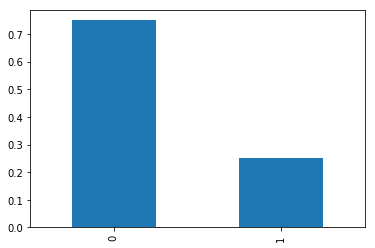

In [8]:
df.churn.value_counts(normalize=True).plot.bar()
plt.show()

#### building predictive algorith using Random Forest

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=3)

In [10]:
from sklearn.preprocessing import StandardScaler   #standarize the data
ss=StandardScaler()
xs=ss.fit_transform(X)

X_trains=ss.fit_transform(X_train)
X_tests=ss.transform(X_test)

In [11]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve

confusion matrix-train
 [[912   0]
 [  0 318]]
overall accuracy-train 1.0
AUC-train 1.0
confusion matrix-test
 [[367  39]
 [ 64  58]]
overall accuracy-test 0.804924242424
AUC-test 0.822427925382


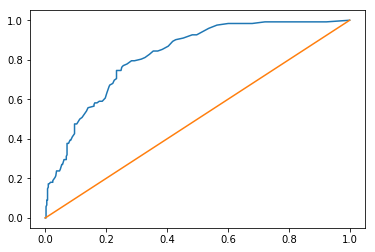

In [12]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()


rfc.fit(X_trains,y_train)

y_pred=rfc.predict(X_trains)

y_train_prob=rfc.predict_proba(X_trains)[:,1]
print('confusion matrix-train\n',confusion_matrix(y_train,y_pred))
print('overall accuracy-train',accuracy_score(y_train,y_pred))
print('AUC-train',roc_auc_score(y_train,y_train_prob))

y_test_pred=rfc.predict(X_tests)
y_test_prob=rfc.predict_proba(X_tests)[:,1]


print('confusion matrix-test\n',confusion_matrix(y_test,y_test_pred))
print('overall accuracy-test',accuracy_score(y_test,y_test_pred))
print('AUC-test',roc_auc_score(y_test,y_test_prob))

fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.show()

# Hyperparameter tuning  of random forest

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

rfc=RandomForestClassifier(random_state=3)
params={'n_estimators':sp_randint(50,200),'max_features':sp_randint(1,24),'max_depth':sp_randint(2,10),
        'min_samples_split':sp_randint(2,20),'min_samples_leaf':sp_randint(2,20),
       'criterion':['gini','entropy']}

rsearch_rfc=RandomizedSearchCV(rfc,param_distributions=params,n_iter=100,cv=3,n_jobs=-1,scoring='roc_auc',
                          return_train_score=True,random_state=3)

rsearch_rfc.fit(xs,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [26]:
rsearch_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 2,
 'min_samples_leaf': 17,
 'min_samples_split': 5,
 'n_estimators': 120}

In [27]:
pd.DataFrame(rsearch_rfc.cv_results_).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.198527,0.036765,0.841739,0.853879,gini,2,4,10,2,71,...,0.845836,0.852078,0.830451,0.860699,0.848930,0.848861,0.021800,0.011845,0.008081,0.004998
1,0.977267,0.065842,0.841063,0.888486,entropy,5,11,13,11,188,...,0.849424,0.887724,0.819193,0.895277,0.854571,0.882456,0.029065,0.008035,0.015606,0.005262
2,0.717240,0.051471,0.839280,0.956215,entropy,9,7,2,14,143,...,0.847097,0.956788,0.817690,0.955860,0.853052,0.955996,0.010527,0.001251,0.015458,0.000409
3,0.970582,0.035094,0.832097,0.960873,entropy,8,18,4,4,110,...,0.838559,0.960733,0.806270,0.963339,0.851464,0.958547,0.012059,0.001638,0.019008,0.001959
4,0.549127,0.050136,0.843139,0.888573,entropy,5,6,10,16,147,...,0.851090,0.885841,0.825779,0.894355,0.852548,0.885524,0.017373,0.009923,0.012290,0.004090


confusion matrix-train
 [[884  28]
 [191 127]]
overall accuracy-train 0.821951219512
AUC-train 0.88540632241
confusion matrix-test
 [[383  23]
 [ 84  38]]
overall accuracy-test 0.797348484848
AUC-test 0.840365824114


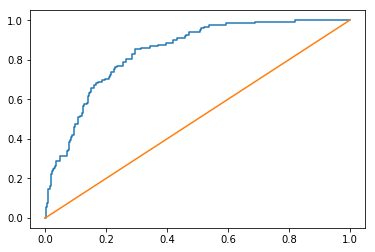

In [28]:
rfc=RandomForestClassifier(**rsearch_rfc.best_params_,random_state=3)


rfc.fit(X_trains,y_train)

y_pred=rfc.predict(X_trains)

y_train_prob=rfc.predict_proba(X_trains)[:,1]
print('confusion matrix-train\n',confusion_matrix(y_train,y_pred))
print('overall accuracy-train',accuracy_score(y_train,y_pred))
print('AUC-train',roc_auc_score(y_train,y_train_prob))

y_test_pred=rfc.predict(X_tests)
y_test_prob=rfc.predict_proba(X_tests)[:,1]


print('confusion matrix-test\n',confusion_matrix(y_test,y_test_pred))
print('overall accuracy-test',accuracy_score(y_test,y_test_pred))
print('AUC-test',roc_auc_score(y_test,y_test_prob))

fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.show()

In [29]:
imp=pd.DataFrame(rfc.feature_importances_,index=X.columns,columns=['imp'])
imp=imp.sort_values(by='imp',ascending=False)
imp

#if tenure is removed from model, then accuracy of model will drop by 15%
#similarly, for other features
#Importance shows how much accuracy will decrease if a feature is removed
#can be used for feature selection, but features can be removed only if importnace is zero
#here, no features should be removed

,imp
tenure,0.155280
total_charges,0.122103
contract-two_year,0.093003
internet_service-fiber_optic,0.081678
avg_monthly_charges,0.080668
monthly_charges,0.080405
payment_method-electronic_check,0.072725
internet_service-no,0.042309
contract-one_year,0.038019
online_security,0.037998


# knn

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from scipy.stats import randint as sp_randint

knn=KNeighborsClassifier()

params={'n_neighbors':sp_randint(1,15),'p':sp_randint(1,5)}
rsearch_knn=RandomizedSearchCV(knn,param_distributions=params,cv=3,n_iter=50,return_train_score=True,n_jobs=-1,random_state=3)
rsearch_knn.fit(xs,y)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=50, n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FFBE25DD30>,
                                        'p': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FFBE284AC8>},
                   pre_dispatch='2*n_jobs', random_state=3, refit=True,
                   return_train_score=True, scoring=None, verbose=0)

In [19]:
rsearch_knn.best_params_

{'n_neighbors': 12, 'p': 3}

confusion matrix-train
 [[827  85]
 [134 184]]
overall accuracy-train 0.821951219512
AUC-train 0.872013957851
confusion matrix-test
 [[359  47]
 [ 59  63]]
overall accuracy-test 0.799242424242
Classification report-test:               precision    recall  f1-score   support

           0       0.86      0.88      0.87       406
           1       0.57      0.52      0.54       122

    accuracy                           0.80       528
   macro avg       0.72      0.70      0.71       528
weighted avg       0.79      0.80      0.80       528

AUC-test 0.812929015586


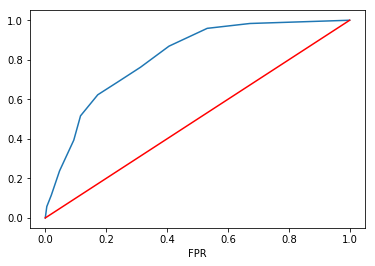

In [20]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve
knn=KNeighborsClassifier(**rsearch_knn.best_params_)

knn.fit(X_trains,y_train)

y_pred=knn.predict(X_trains)

y_train_prob=knn.predict_proba(X_trains)[:,1]
print('confusion matrix-train\n',confusion_matrix(y_train,y_pred))
print('overall accuracy-train',accuracy_score(y_train,y_pred))
print('AUC-train',roc_auc_score(y_train,y_train_prob))

y_test_pred=knn.predict(X_tests)
y_test_prob=knn.predict_proba(X_tests)[:,1]


print('confusion matrix-test\n',confusion_matrix(y_test,y_test_pred))
print('overall accuracy-test',accuracy_score(y_test,y_test_pred))
print('Classification report-test:',classification_report(y_test,y_test_pred))
print('AUC-test',roc_auc_score(y_test,y_test_prob))

fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.show()


# Stacking rsults of 3 learners(random forest,knn,logistic reg)

confusion matrix-train
 [[826  86]
 [146 172]]
overall accuracy-train 0.811382113821
AUC-train 0.855832092023
confusion matrix-test
 [[359  47]
 [ 57  65]]
overall accuracy-test 0.80303030303
Classification report-test:               precision    recall  f1-score   support

           0       0.86      0.88      0.87       406
           1       0.58      0.53      0.56       122

    accuracy                           0.80       528
   macro avg       0.72      0.71      0.71       528
weighted avg       0.80      0.80      0.80       528

AUC-test 0.843111523863


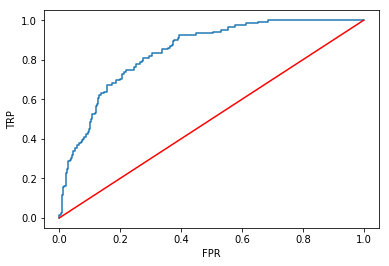

In [23]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear')

lr.fit(X_trains,y_train)


y_pred=lr.predict(X_trains)

y_train_prob=lr.predict_proba(X_trains)[:,1]
print('confusion matrix-train\n',confusion_matrix(y_train,y_pred))
print('overall accuracy-train',accuracy_score(y_train,y_pred))
print('AUC-train',roc_auc_score(y_train,y_train_prob))

y_test_pred=lr.predict(X_tests)
y_test_prob=lr.predict_proba(X_tests)[:,1]


print('confusion matrix-test\n',confusion_matrix(y_test,y_test_pred))
print('overall accuracy-test',accuracy_score(y_test,y_test_pred))
print('Classification report-test:',classification_report(y_test,y_test_pred))
print('AUC-test',roc_auc_score(y_test,y_test_prob))

fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TRP')
plt.show()

In [31]:
from sklearn.ensemble import VotingClassifier
lr=LogisticRegression(solver='liblinear')

knn=KNeighborsClassifier(**rsearch_knn.best_params_)
rfc=RandomForestClassifier(**rsearch_rfc.best_params_)

In [33]:
#hard voting
clf=VotingClassifier(estimators=[('lr',lr),('knn',knn),('rfc',rfc)],voting='hard')
clf.fit(X_trains,y_train)
y_train_pred=clf.predict(X_trains)
y_test_pred=clf.predict(X_tests)

print('Accuracy score-train:',accuracy_score(y_train,y_train_pred))
print('Accuracy score-test:',accuracy_score(y_test,y_test_pred))
#apply 0.5 cufoff to each and then vote

Accuracy score-train: 0.817886178862
Accuracy score-test: 0.799242424242


confusion matrix-train
 [[884  28]
 [191 127]]
overall accuracy-train 0.821951219512
AUC-train 0.883661591085
confusion matrix-test
 [[368  38]
 [ 64  58]]
overall accuracy-test 0.806818181818
Classification report-test:               precision    recall  f1-score   support

           0       0.85      0.91      0.88       406
           1       0.60      0.48      0.53       122

    accuracy                           0.81       528
   macro avg       0.73      0.69      0.71       528
weighted avg       0.79      0.81      0.80       528

AUC-test 0.840002422676


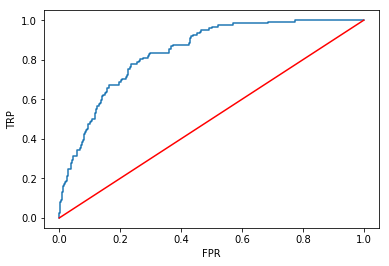

In [36]:
#soft voting-Equal weightage -apply average and then 0.5 cutoff 1-lr(1/6),2-knn(2/6),3-rfc(3/6)
clf=VotingClassifier(estimators=[('lr',lr),('knn',knn),('rfc',rfc)],weights=[1,2,3],voting='soft')

clf.fit(X_trains,y_train)
y_train_pred=clf.predict(X_trains)
y_train_prob=clf.predict_proba(X_trains)[:,1]

print('confusion matrix-train\n',confusion_matrix(y_train,y_pred))
print('overall accuracy-train',accuracy_score(y_train,y_pred))
print('AUC-train',roc_auc_score(y_train,y_train_prob))

y_test_pred=clf.predict(X_tests)
y_test_prob=clf.predict_proba(X_tests)[:,1]


print('confusion matrix-test\n',confusion_matrix(y_test,y_test_pred))
print('overall accuracy-test',accuracy_score(y_test,y_test_pred))
print('Classification report-test:',classification_report(y_test,y_test_pred))
print('AUC-test',roc_auc_score(y_test,y_test_prob))

fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TRP')
plt.show()
